In [8]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from pycaret.classification import *

Loading the data

In [9]:
fitbit_df = pd.read_pickle('data/fitbit_to_predict_demographics.pkl')
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,None,2351.59,62.79210,6517.5,[Walk],71.701565,149.0,24.0,33.0,713.0,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,None,3682.90,46.44026,8567.1,None,81.644017,227.0,8.0,3.0,729.0,False,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,<30,FEMALE,19.0
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2147.17,49.73933,5337.8,[Run],104.619583,61.0,3.0,43.0,1333.0,False,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,>=30,MALE,23.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,None,1723.61,45.23770,5028.5,None,77.061042,272.0,8.0,2.0,723.0,False,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,>=30,FEMALE,<19
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,None,2393.99,43.67853,2444.9,None,94.808800,143.0,0.0,0.0,796.0,False,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,<30,MALE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1339.20,NaN,NaN,None,NaN,0.0,0.0,0.0,1440.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,20.0
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1252.80,NaN,NaN,None,NaN,0.0,0.0,0.0,1440.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>=30,FEMALE,20.0
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,[DAILY_FLOORS],2150.69,44.99934,3079.0,None,NaN,176.0,4.0,5.0,579.0,False,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,>=30,MALE,27.0
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,-2.346201,"[DAILY_FLOORS, LIFETIME_FLOORS]",1864.23,60.17697,2233.9,None,63.148837,157.0,0.0,0.0,706.0,False,NaN,58.144251,29940000.0,0.0,421.0,78.0,0.0,94.0,0.701754,1.368421,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,<30,MALE,20.0


Gender prediction

In [10]:
data = fitbit_df.drop(columns=['date','age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

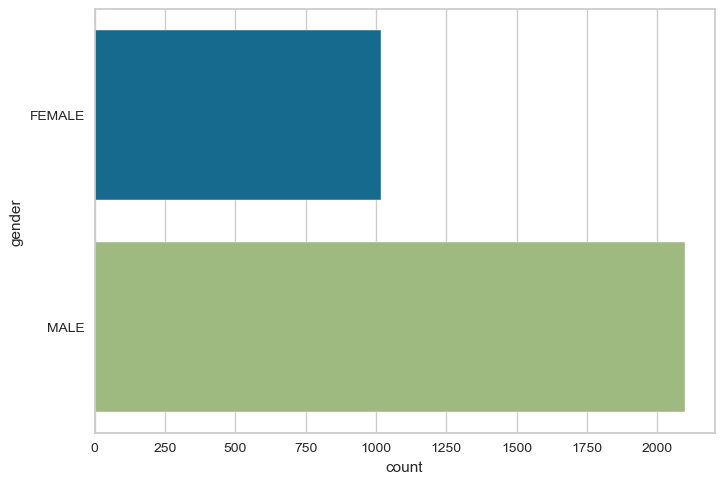

In [11]:
sns.countplot(y="gender", data=train_data)

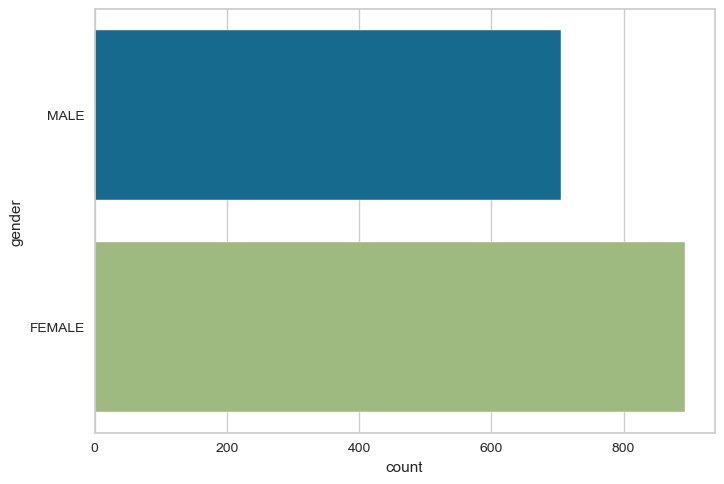

In [12]:
sns.countplot(y="gender", data=test_data)

In [13]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [14]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"FEMALE: 0, MALE: 1"
4,Original Data,"(3308, 39)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='gender',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [15]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9126,0.0000,0.9657,0.9196,0.9365,0.7980,0.8229,0.0900
lda,Linear Discriminant Analysis,0.9088,0.9643,0.9590,0.9198,0.9330,0.7904,0.8157,0.1000
lightgbm,Light Gradient Boosting Machine,0.9049,0.9584,0.9295,0.9278,0.9261,0.7878,0.7970,0.6867
ada,Ada Boost Classifier,0.8991,0.9373,0.9516,0.9063,0.9252,0.7623,0.7776,0.3233
gbc,Gradient Boosting Classifier,0.8990,0.9548,0.9344,0.9175,0.9229,0.7719,0.7838,0.8133
et,Extra Trees Classifier,0.8312,0.8987,0.9691,0.8170,0.8842,0.5800,0.6162,0.2733
rf,Random Forest Classifier,0.8279,0.8886,0.9380,0.8346,0.8790,0.5874,0.6159,0.3700
dt,Decision Tree Classifier,0.8152,0.8083,0.8510,0.8740,0.8574,0.5890,0.6062,0.0933
knn,K Neighbors Classifier,0.7331,0.7337,0.8731,0.7626,0.8127,0.3468,0.3573,1.1433
lr,Logistic Regression,0.6908,0.7269,0.8354,0.7648,0.7839,0.2501,0.2538,2.8233


create_model_container: 14
master_model_container: 14
display_container: 2
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
compare_models() succesfully completed......................................


In [16]:
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

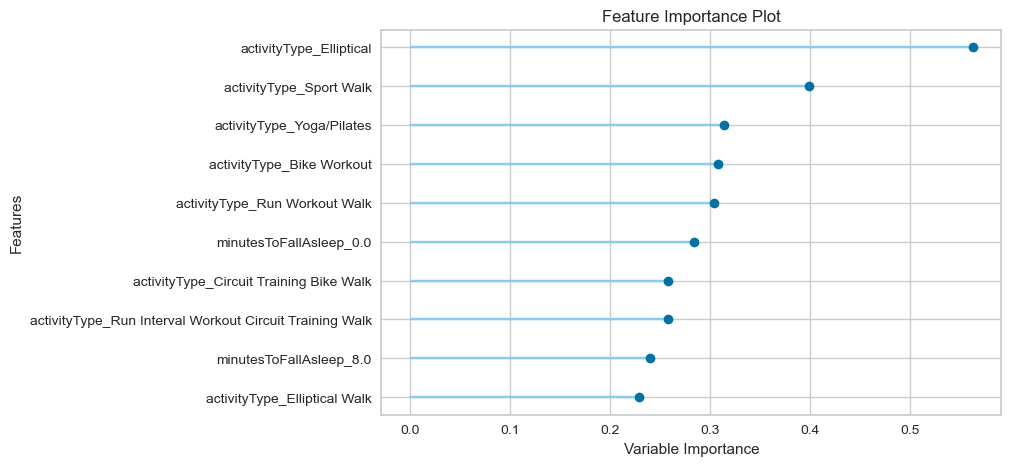

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [17]:
plot_model(best, plot='feature')

Age prediction

In [18]:
data = fitbit_df.drop(columns=['date', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

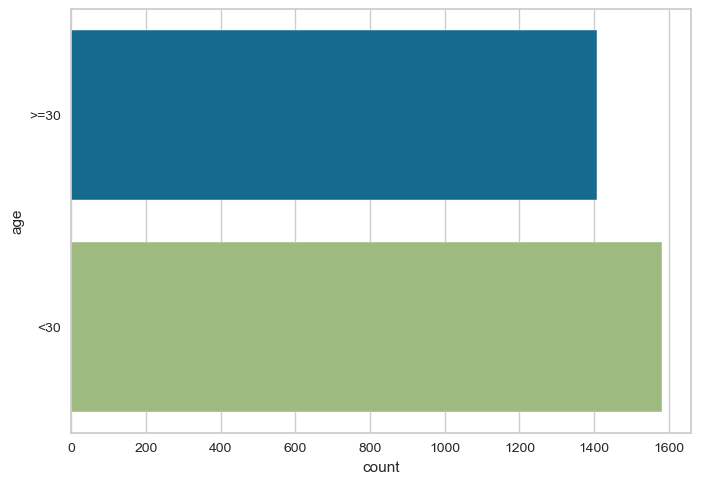

In [19]:
sns.countplot(y="age", data=train_data)

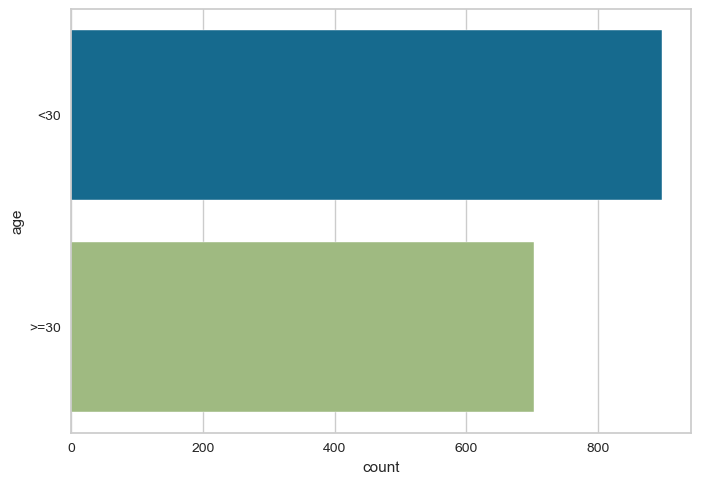

In [20]:
sns.countplot(y="age", data=test_data)

In [21]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [22]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"<30: 0, >=30: 1"
4,Original Data,"(3308, 39)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                

In [23]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6343,0.0000,0.3333,0.2208,0.2657,0.0000,0.0000,0.1133
et,Extra Trees Classifier,0.5959,0.6072,0.5095,0.5991,0.5152,0.1921,0.2300,0.2367
rf,Random Forest Classifier,0.5913,0.6294,0.5212,0.5914,0.5113,0.1849,0.2282,0.2433
lightgbm,Light Gradient Boosting Machine,0.5733,0.6673,0.5578,0.5757,0.5236,0.1659,0.2115,0.3367
dt,Decision Tree Classifier,0.5675,0.5825,0.4451,0.5698,0.4673,0.1320,0.1627,0.0733
gbc,Gradient Boosting Classifier,0.5640,0.6608,0.5644,0.5844,0.5306,0.1671,0.2030,0.7000
ada,Ada Boost Classifier,0.5567,0.6405,0.6042,0.5546,0.5497,0.1491,0.1690,0.2300
nb,Naive Bayes,0.5438,0.5310,0.3153,0.5349,0.3896,0.0625,0.0780,0.0567
qda,Quadratic Discriminant Analysis,0.5212,0.4629,0.6802,0.4461,0.4994,-0.0366,-0.0841,0.1800
ridge,Ridge Classifier,0.5008,0.0000,0.3668,0.4882,0.4045,-0.0042,0.0133,0.0700


create_model_container: 14
master_model_container: 14
display_container: 2
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
compare_models() succesfully completed......................................


In [24]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

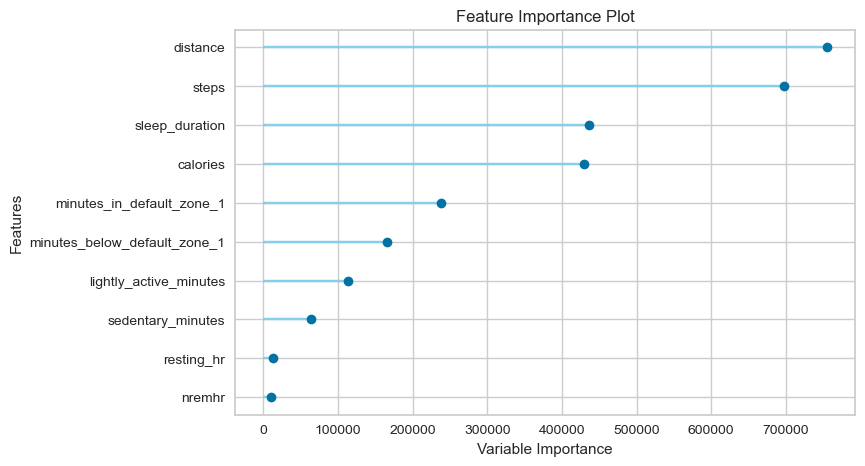

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [25]:
plot_model(best, plot='feature')

BMI prediction

In [41]:
data = fitbit_df.drop(columns=['date', 'gender', 'age'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

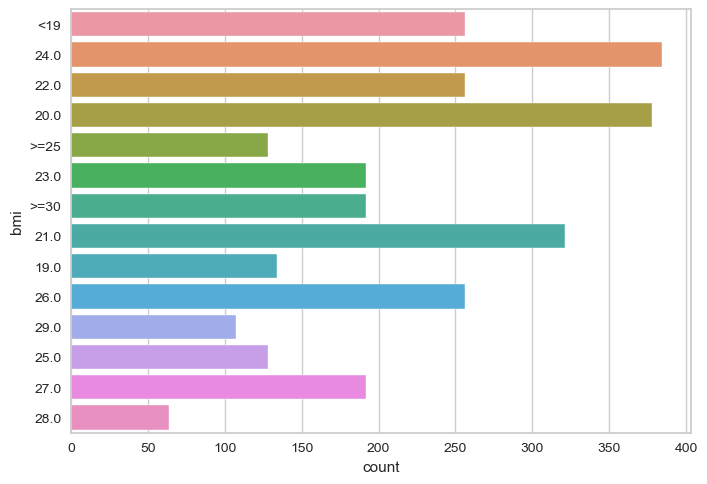

In [42]:
sns.countplot(y="bmi", data=train_data)

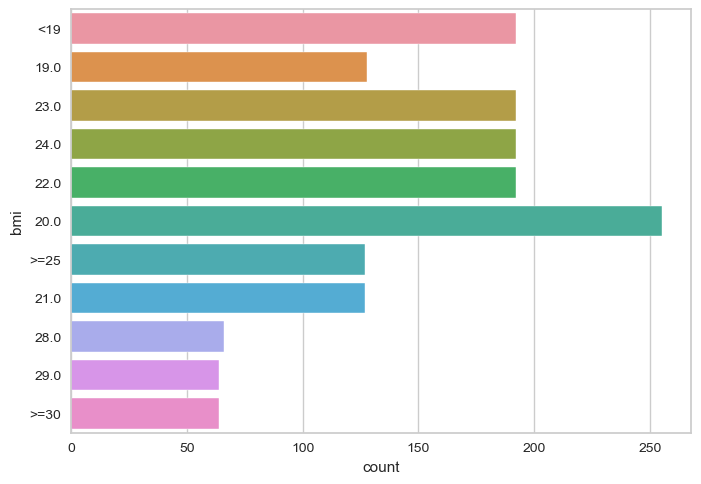

In [43]:
sns.countplot(y="bmi", data=test_data)

In [44]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [45]:
s = setup(data=train_data, target='bmi', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,bmi
2,Original Data,"(3308, 39)"
3,Missing Values,True
4,Numeric Features,33
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2988, 111)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='bmi',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='m...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='bmi')),
    

In [46]:
best = compare_models(errors="raise")

Initializing compare_models()
compare_models(include=None, fold=None, round=4, cross_validation=True, sort=R2, n_select=1, budget_time=None, turbo=True, errors=raise, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, display=None, exclude=None)
Checking exceptions
Preparing display monitor
Preparing display monitor


IntProgress(value=0, description='Processing: ', max=94)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:30:58
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


Initializing Linear Regression
Total runtime is 2.4799505869547526e-05 minutes
SubProcess create_model() called ==================================
Initializing create_model()
create_model(estimator=lr, fold=GroupKFold(n_splits=3), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=4       621e360b67b776a24039709f
7       621e362467b776a2404ad513
9       621e351a67b776a240f6204b
13      621e36bb67b776a240b40d64
14      621e36c267b776a240ba2756
                  ...           
4958    621e312a67b776a240164d59
4959    621e345267b776a240691064
4960    621e310d67b776a24003096d
4961    621e324e67b776a2400191cb
4962    621e30f467b776a240f22944
Name: id, Length: 2988, dtype: object, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x0000017536C2AAC0>, return_train_score=False, kwargs={})
Checking exceptions
Importing libraries
Copying trai

TypeError: unsupported operand type(s) for +: 'float' and 'str'

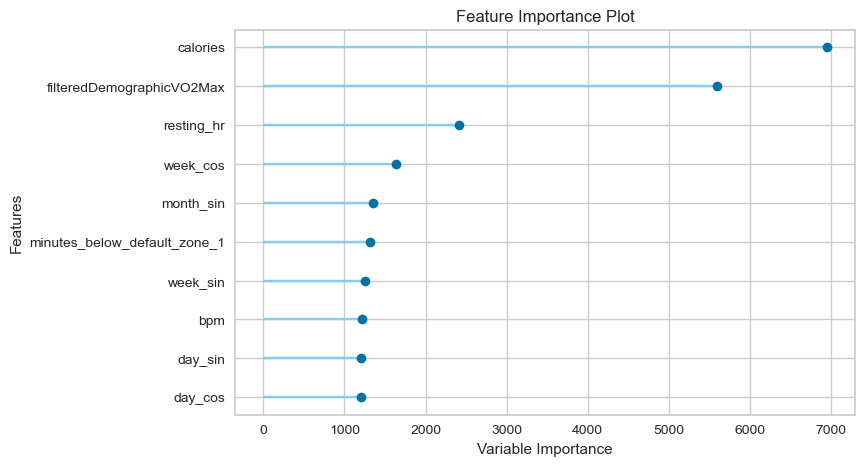

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [15]:
plot_model(best, plot='feature')

VO2Max prediction

In [32]:
from pycaret.regression import *

In [35]:
data = fitbit_df.drop(columns=['date', 'gender', 'age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [36]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

Don't look for imbalance in regression

In [37]:
s = setup(data=train_data, target='filteredDemographicVO2Max', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,filteredDemographicVO2Max
2,Original Data,"(3308, 38)"
3,Missing Values,True
4,Numeric Features,32
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2606, 109)"


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='filteredDemographicVO2Max',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=No...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='filteredDemographicVO2Max')),
                ('fix_perfect', Remove_100(target='fi

In [38]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,4.9801,39.1709,6.2444,0.0536,0.1356,0.1115,1.0000
en,Elastic Net,5.0504,41.1583,6.3913,0.0145,0.1387,0.1131,0.0800
ada,AdaBoost Regressor,5.2282,41.9867,6.4354,0.0034,0.1396,0.1170,0.3233
et,Extra Trees Regressor,5.1117,42.4495,6.4491,-0.0078,0.1400,0.1142,0.5367
gbr,Gradient Boosting Regressor,5.2083,44.3975,6.5920,-0.0530,0.1426,0.1159,0.5633
dummy,Dummy Regressor,5.5952,46.0940,6.7483,-0.0933,0.1468,0.1261,0.0700
llar,Lasso Least Angle Regression,5.5952,46.0940,6.7483,-0.0933,0.1468,0.1261,0.0800
lightgbm,Light Gradient Boosting Machine,5.2858,45.4366,6.7031,-0.0998,0.1453,0.1184,0.5333
rf,Random Forest Regressor,5.2293,45.5116,6.7288,-0.1115,0.1456,0.1172,0.8033
br,Bayesian Ridge,5.1569,47.3048,6.8137,-0.1123,0.1452,0.1151,0.1500


create_model_container: 18
master_model_container: 18
display_container: 2
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
compare_models() succesfully completed......................................


In [39]:
best

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

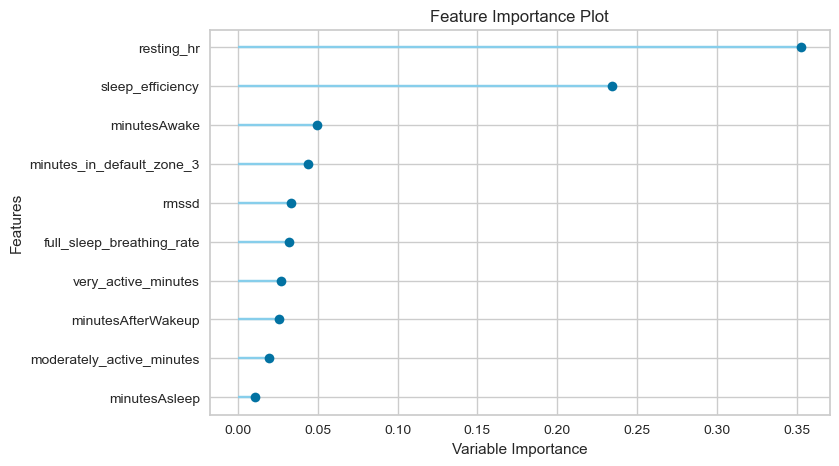

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [40]:
plot_model(best, plot='feature')